In [1]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')

# Project 8 _ Gold Price Prediction
### YT - Siddhardhan

##### Car Data ---> Data Pre-Processing ---> Data Analysis ---> Train Test Split ---> Random Forest Regression Model

In [14]:
# Importing the Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [4]:
# Data Collection
gold_data = pd.read_csv(r'C:\Users\Home\Desktop\ML Projects\YT - Siddhardhan\Gold_Price_Data.csv')
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [6]:
# Checking Missing Values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
# Statistical Measure of Dataset
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<AxesSubplot:>

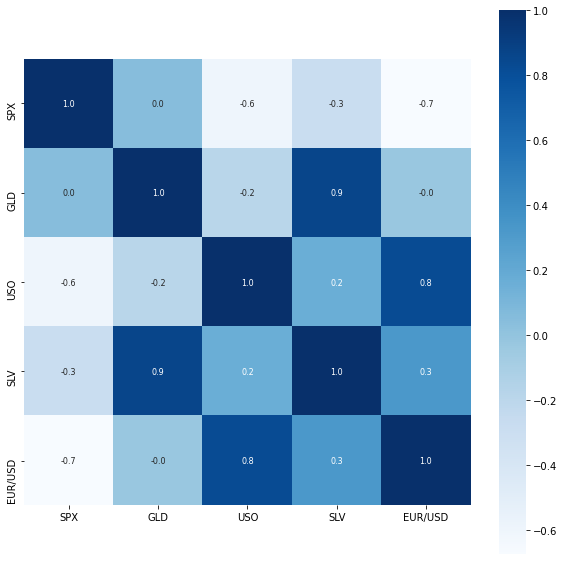

In [8]:
# Contructing a Heatmap to understand the correlation among the features
correlation = gold_data.corr()
plot = plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',
            annot=True,annot_kws={'size':8},cmap='Blues')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

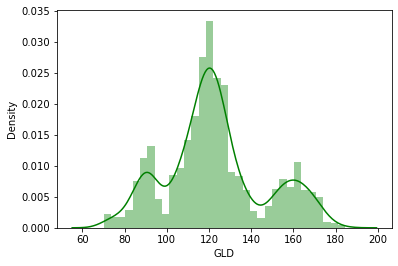

In [9]:
# Checking the distribution of GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [11]:
# Splitting the Features and Target
X = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [24]:
# Training and Testing Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=42)

In [25]:
# Training the Model
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [26]:
# Model Evaluation

# R square error on the training data
train_prediction = model.predict(X_train)
training_data_accuracy = metrics.r2_score(train_prediction,y_train)
print("accuracy on the training data :  ",training_data_accuracy)

# R square error on the test data
test_prediction = model.predict(X_test)
testing_data_accuracy = metrics.r2_score(test_prediction,y_test)
print("accuracy on the testing data :  ",testing_data_accuracy)

accuracy on the training data :   0.9985370757323745
accuracy on the testing data :   0.9915372855558142


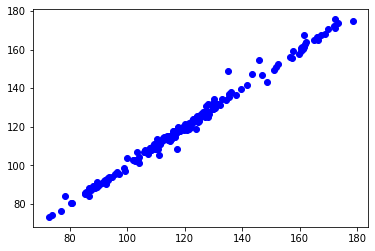

In [30]:
plt.scatter(y_test,test_prediction,color='blue')